# Week 2 Supervised Learning - Regression 

Jacob Krol

## Assignment
Motivation

To practice the creation of a predictive regression model in Python.

Study summary

A study seeks to quantify the effectivity of a drug in a clinical population with systemic hypertension (SH). The team enrolled 250 patients with diagnosis of SH and no other known comorbidities. For each individual, the systolic blood pressure was measured after a minimum of 12 hours of fasting. Then, a random safe dose of the tested drug within acceptable thresholds was administered daily during a period of 30 days, after which the systolic blood pressure was measured again under the same conditions.

The principal investigator of this project is interested in evaluating if the systolic blood pressure can be predicted after 30 days of treatment based on the measured values before the treatment, the administered drug dose and basic patient information such as age and/or sex.

Goals

    Build and evaluate a regression model that can predict the systolic blood pressure after 30 days of treatment. Provide:
        A mathematical equation that predicts the systolic blood pressure after 30 days of treatment.
        A performance evaluation of the predictive model in the training dataset. Please, use both quantitative metrics and graphic representations to explain your model’s performance.
        An Excel file that appends a column with the predicted values to the provided data.

 

    Discuss the quantitative effect of every individual variable in the outcomes. For each available variable, would you say that:
        it has a linear effect in the treatment outcomes?
        it has a non-linear effect in the treatment outcomes?
        it has no significant effect in the treatment outcomes?

      Justify your answer.

## Linear Regression basics


**SSR**: sum of squared residuals is the cost function that needs to be minimized

$SSR = \sum{(y_{i} - f(\bf{x}_{i}))^{2}}$

Otherwise known as least squares regression. 

**Coefficient of determination ($R^{2}$)**: is the amount of variance in $y$ that can be explained by $\bf{x}$

$R^{2} = 1$ when the regression model has no residuals ($SSR = 0$)


In [1]:
import numpy as np
import pandas as pd
import scipy
import shelve

import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
df = pd.read_excel("BloodPressureData.xlsx")
df

,Age (years),"Sex (0:female, 1:male)",Initial systolic pressure (mm Hg),Drug dose (mg),Systolic pressure after treatment (mm Hg)
0,86,0,171.221889,7.144833,153.874218
1,79,0,166.426064,7.984246,143.468111
2,90,1,163.676760,7.271092,148.559803
3,85,1,146.621486,7.770628,124.180775
4,81,1,142.752645,7.233099,123.560301
...,...,...,...,...,...
245,68,0,153.376172,4.508678,140.633827
246,79,1,154.226723,9.997879,124.886472
247,74,1,172.247996,5.327183,160.252881
248,70,1,160.470862,4.311250,148.749399


In [3]:
# select training data
x = df.iloc[:, 0: len(df.columns) -1]
#x = np.array(x, dtype=np.float32)
print(x.ndim, x.shape)

2 (250, 4)


In [4]:
# select outcomes
y = df.loc[:, "Systolic pressure after treatment (mm Hg)"]
#y = np.array(y, dtype=np.float32)
y
print(y.ndim, y.shape)

1 (250,)


In [5]:
# fit LR model
reg = LinearRegression().fit(x, y)
# R^2
reg.score(x, y)


0.9604901732341053

In [6]:
# get bias/intercept
reg.intercept_

-7.40721919911573

In [7]:
y_pred = reg.predict(x)
df["Predicted Systolic BP 30 days after treatment (mm Hg)"] = y_pred
df.to_excel("data_w_lin_reg_pred.xlsx")
df


,Age (years),"Sex (0:female, 1:male)",Initial systolic pressure (mm Hg),Drug dose (mg),Systolic pressure after treatment (mm Hg),Predicted Systolic BP 30 days after treatment (mm Hg)
0,86,0,171.221889,7.144833,153.874218,150.752213
1,79,0,166.426064,7.984246,143.468111,142.865320
2,90,1,163.676760,7.271092,148.559803,145.670404
3,85,1,146.621486,7.770628,124.180775,126.408574
4,81,1,142.752645,7.233099,123.560301,123.868637
...,...,...,...,...,...,...
245,68,0,153.376172,4.508678,140.633827,139.543344
246,79,1,154.226723,9.997879,124.886472,127.001528
247,74,1,172.247996,5.327183,160.252881,159.463767
248,70,1,160.470862,4.311250,148.749399,150.305880


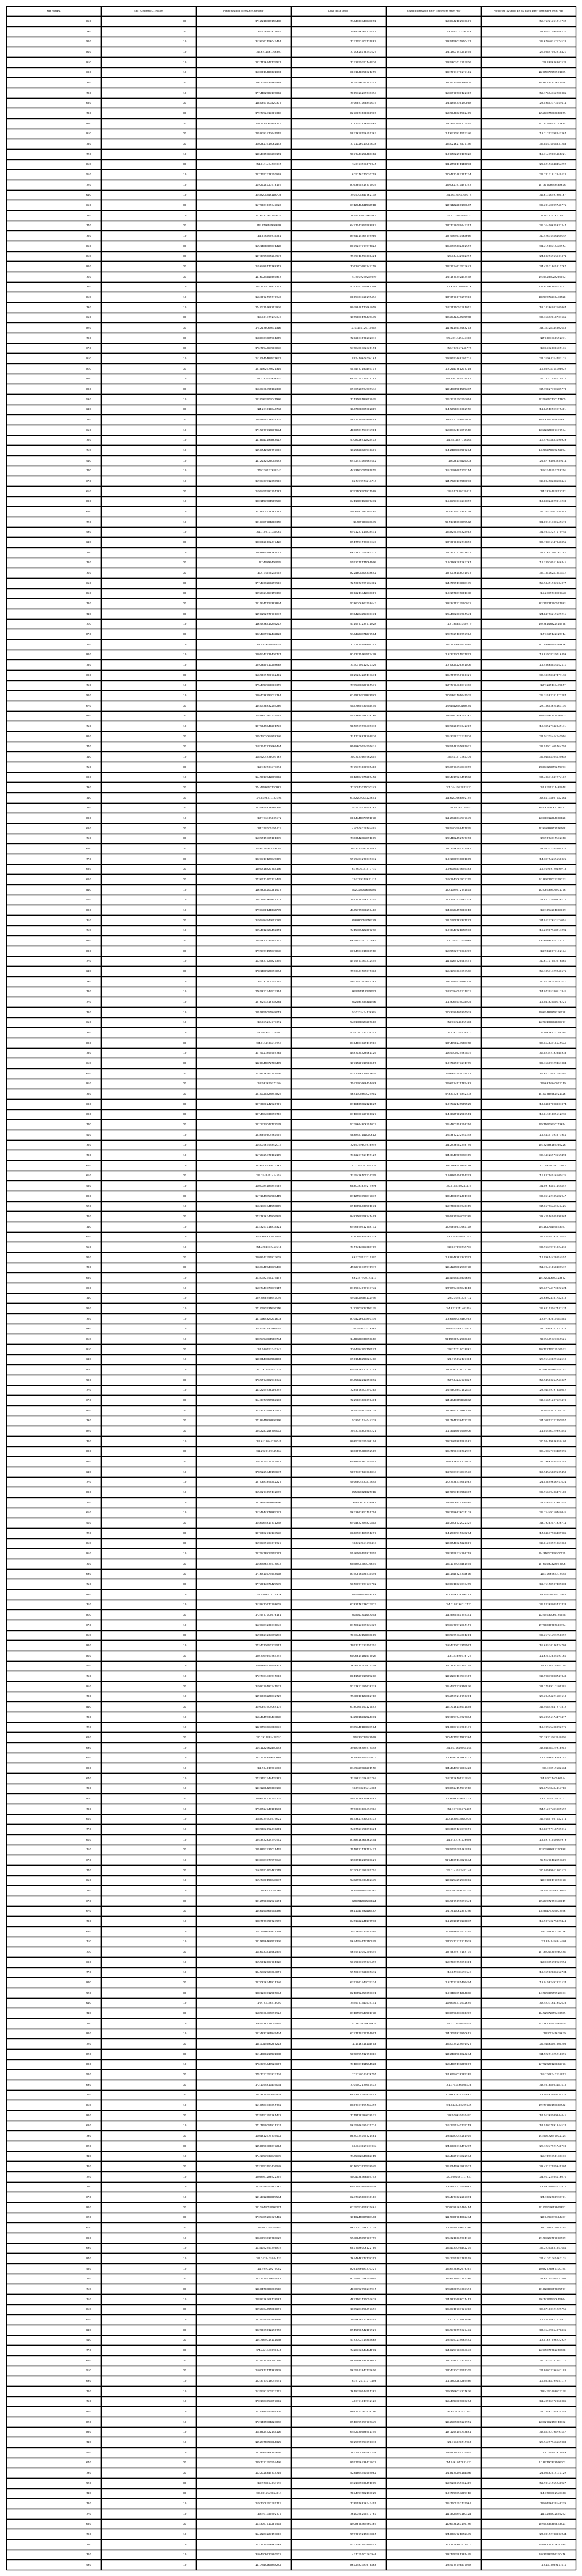

In [8]:
fig, ax = plt.subplots(figsize = (12,14))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values, colLabels=df.columns, loc = 'center')
pp = PdfPages('data_w_lin_reg_pred.pdf')
pp.savefig(fig, bbox_inches = 'tight')
pp.close()


In [9]:
df_coef = pd.DataFrame(zip(df.columns[0:-1], reg.coef_), columns = ["predictor", "coefficent"])
df_coef

,predictor,coefficent
0,Age (years),0.058345
1,"Sex (0:female, 1:male)",2.786431
2,Initial systolic pressure (mm Hg),1.022419
3,Drug dose (mg),-3.067780


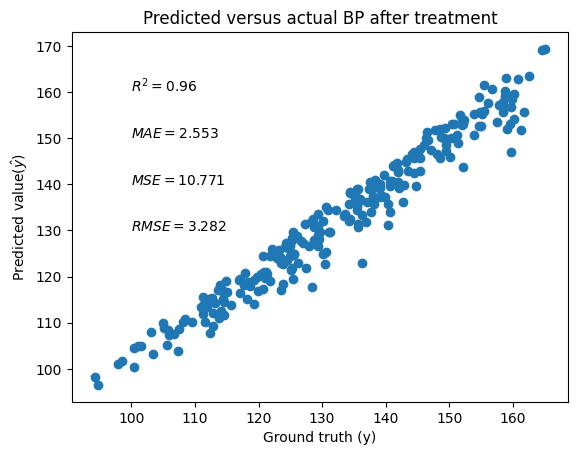

In [10]:
def lr_perfomance():
    r_squared = round(reg.score(x,y), 3)
    mae = round(sklearn.metrics.mean_absolute_error(y, y_pred), 3)
    mse = round(sklearn.metrics.mean_squared_error(y, y_pred), 3)
    rmse = round(np.sqrt(sklearn.metrics.mean_squared_error(y, y_pred)), 3)
    fig, ax = plt.subplots()
    ax.set_xlabel("Ground truth (y)")
    ax.set_ylabel("Predicted value($\hat{y}$)")
    ax.scatter(y, y_pred)
    ax.text(x = 100, y = 160, s = f"$R^2 = ${r_squared}")
    ax.text(x = 100, y = 150, s = f"$MAE = ${mae}")
    ax.text(x = 100, y = 140, s = f"$MSE = ${mse}")
    ax.text(x = 100, y = 130, s = f"$RMSE = ${rmse}")
    ax.set_title("Predicted versus actual BP after treatment")

lr_perfomance()

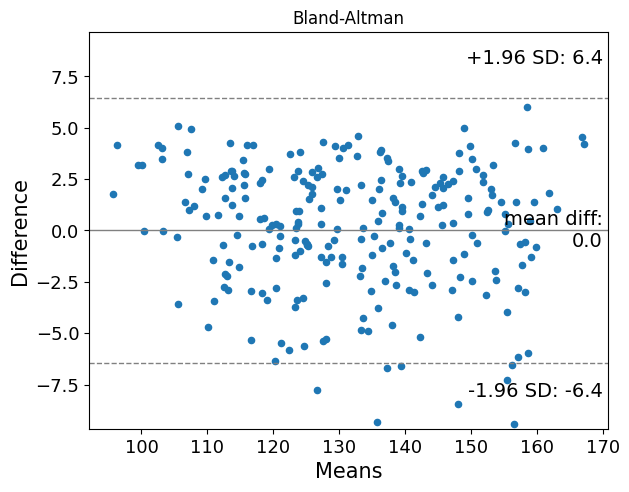

In [11]:
#create Bland-Altman plot                  
def lr_bland_altman():
    fig, ax = plt.subplots()
    sm.graphics.mean_diff_plot(y_pred, y, ax = ax)

    ax.set_title("Bland-Altman")
    plt.show()
lr_bland_altman()

Bland-Altman

X-axis: the mean for each (y, y_pred) pair

Y-axis: the residual (y - y_pred)

$y = 150$

$\hat{y} = 153$

example $150-153$ 

As the ground truth BP increases, the model tends to overpredict, shown by the slight increased density of of negative residuals in the Bland-Altman graph





predictor v actual

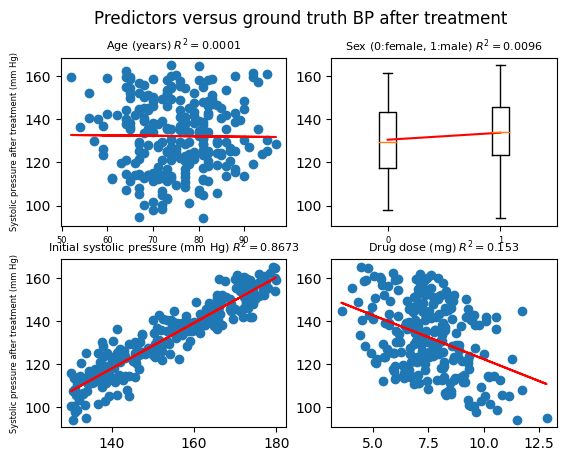

In [70]:
# predictor v actual plot
def lr_pred_v_actual(x, y):
    fig, ax = plt.subplots(nrows=2, ncols =2)

    x_i = x.loc[:, "Age (years)"]
    ax[0,0].scatter(x_i, y)
    m, b = np.polyfit(x_i, y, 1)
    x_i_sm = sm.add_constant(x_i)
    model = sm.OLS(y, x_i_sm)
    r_squared = round(model.fit().rsquared, 4)
    ax[0,0].plot(x_i, (m*x_i)+b, color = "r")
    ax[0,0].set_title(label = f"Age (years) $R^{2} = ${r_squared}")
    ax[0,0].title.set_size(8)
    ax[0,0].tick_params(axis = "x", labelsize = 6)
    ax[0,0].set_ylabel('Systolic pressure after treatment (mm Hg)', size = 6)

    x_i = x.loc[:, "Sex (0:female, 1:male)"]
    x_i_female = x_i[x_i == 0]
    y_i_female = y[x_i_female.index]
    ax[0,1].boxplot(y_i_female, positions = [0])
    x_i_male = x_i[x_i == 1]
    y_i_male = y[x_i_male.index]
    ax[0,1].boxplot(y_i_male, positions = [1])
    m, b = np.polyfit(x_i, y, 1)
    x_i_sm = sm.add_constant(x_i)
    model = sm.OLS(y, x_i_sm)
    r_squared = round(model.fit().rsquared, 4)
    ax[0,1].plot(x_i, (m*x_i)+b, color = "r")
    ax[0,1].set_title(label = f"Sex (0:female, 1:male) $R^{2} = ${r_squared}")
    ax[0,1].title.set_size(8)
    ax[0,1].tick_params(axis = "x", labelsize = 6)

    x_i = x.loc[:, "Initial systolic pressure (mm Hg)"]
    ax[1,0].scatter(x_i, y)
    m, b = np.polyfit(x_i, y, 1)
    x_i_sm = sm.add_constant(x_i)
    model = sm.OLS(y, x_i_sm)
    r_squared = round(model.fit().rsquared, 4)
    ax[1,0].plot(x_i, (m*x_i)+b, color = "r")
    ax[1,0].set_title(label = f"Initial systolic pressure (mm Hg) $R^{2} = ${r_squared}")
    ax[1,0].title.set_size(8)
    ax[1,0].set_ylabel('Systolic pressure after treatment (mm Hg)', size = 6)

    x_i = x.loc[:, "Drug dose (mg)"]
    ax[1,1].scatter(x_i, y)
    m, b = np.polyfit(x_i, y, 1)
    x_i_sm = sm.add_constant(x_i)
    model = sm.OLS(y, x_i_sm)
    r_squared = round(model.fit().rsquared, 4)
    ax[1,1].plot(x_i, (m*x_i)+b, color = "r")
    ax[1,1].set_title(label = f"Drug dose (mg) $R^{2} = ${r_squared}")
    ax[1,1].title.set_size(8)
    fig.suptitle("Predictors versus ground truth BP after treatment")
lr_pred_v_actual(x,y)

predictor v residual

In [61]:
x_i_male = x.loc[:, "Sex (0:female, 1:male)"]
x_i_male[x_i_male == 1]
y_male = y[x_i_male.index]
y_male

0      153.874218
1      143.468111
2      148.559803
3      124.180775
4      123.560301
          ...    
245    140.633827
246    124.886472
247    160.252881
248    148.749399
249    123.517580
Name: Systolic pressure after treatment (mm Hg), Length: 250, dtype: float64

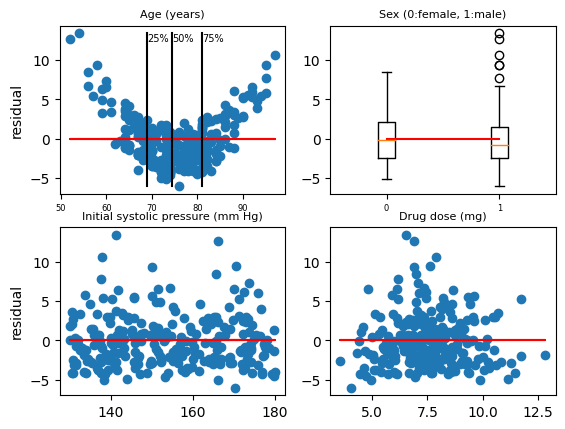

In [68]:
# predictor v residual plot
def lr_pred_v_residual():
    fig, ax = plt.subplots(nrows=2, ncols =2)
    residuals = y - y_pred
    x_i = x.loc[:, "Age (years)"]
    ax[0,0].scatter(x_i, residuals); 
    ax[0,0].plot(x_i, np.zeros(shape = (len(x_i))), color = 'red',  linestyle = '-')
    # plot quartiles
    ax[0,0].plot(np.repeat(np.quantile(x_i, q = 0.25), 2), np.array([min(residuals), max(residuals)]), color = 'black', linestyle = '-' )
    ax[0,0].plot(np.repeat(np.quantile(x_i, q = 0.50), 2), np.array([min(residuals), max(residuals)]),  color = 'black', linestyle = '-' )
    ax[0,0].plot(np.repeat(np.quantile(x_i, q = 0.75), 2), np.array([min(residuals), max(residuals)]),  color = 'black', linestyle = '-' )
    ax[0,0].text(x = np.quantile(x_i, q = 0.25), y = max(residuals) - 1, s = "25%", size = 7)
    ax[0,0].text(x = np.quantile(x_i, q = 0.50), y = max(residuals) - 1, s = "50%", size = 7)
    ax[0,0].text(x = np.quantile(x_i, q = 0.75), y = max(residuals) - 1, s = "75%", size = 7)
    ax[0,0].set_title(label = "Age (years)")
    ax[0,0].title.set_size(8)
    ax[0,0].tick_params(axis = "x", labelsize = 6)
    ax[0,0].set_ylabel('residual')

    x_i = x.loc[:, "Sex (0:female, 1:male)"]
    x_i_female = x_i[x_i == 0]
    res_female = y[x_i_female.index] - y_pred[x_i_female.index]
    x_i_male = x_i[x_i == 1]
    res_male = y[x_i_male.index] - y_pred[x_i_male.index]
    ax[0,1].boxplot(res_female, positions = [0])
    ax[0,1].boxplot(res_male, positions = [1])
    ax[0,1].plot(x_i, np.zeros(shape = (len(x_i))), color = 'red',  linestyle = '-')
    ax[0,1].set_title(label = "Sex (0:female, 1:male)")
    ax[0,1].title.set_size(8)
    ax[0,1].tick_params(axis = "x", labelsize = 6)

    x_i = x.loc[:, "Initial systolic pressure (mm Hg)"]
    ax[1,0].scatter(x_i, y - y_pred)
    ax[1,0].plot(x_i, np.zeros(shape = (len(x_i))), color = 'red',  linestyle = '-')
    ax[1,0].set_title(label = "Initial systolic pressure (mm Hg)")
    ax[1,0].title.set_size(8)
    ax[1,0].set_ylabel('residual')

    x_i = x.loc[:, "Drug dose (mg)"]
    ax[1,1].scatter(x_i, y - y_pred)
    ax[1,1].plot(x_i, np.zeros(shape = (len(x_i))), color = 'red',  linestyle = '-')
    ax[1,1].set_title(label = "Drug dose (mg)")
    ax[1,1].title.set_size(8)
lr_pred_v_residual()

Statsmodels

In [ ]:
# add default bias constant
x_sm = sm.add_constant(x)

model = sm.OLS(y, x_sm)
results = model.fit()
results.params

const                               -7.407219
Age (years)                          0.058345
Sex (0:female, 1:male)               2.786431
Initial systolic pressure (mm Hg)    1.022419
Drug dose (mg)                      -3.067780
dtype: float64

In [ ]:
# t test for constant
print(results.summary())

                                        OLS Regression Results                                       
Dep. Variable:     Systolic pressure after treatment (mm Hg)   R-squared:                       0.960
Model:                                                   OLS   Adj. R-squared:                  0.960
Method:                                        Least Squares   F-statistic:                     1489.
Date:                                       Sun, 17 Sep 2023   Prob (F-statistic):          1.48e-170
Time:                                               17:27:45   Log-Likelihood:                -651.85
No. Observations:                                        250   AIC:                             1314.
Df Residuals:                                            245   BIC:                             1331.
Df Model:                                                  4                                         
Covariance Type:                                   nonrobust                      

In [ ]:
results.pvalues

const                                 2.209503e-02
Age (years)                           1.778420e-02
Sex (0:female, 1:male)                2.380004e-10
Initial systolic pressure (mm Hg)    2.056217e-164
Drug dose (mg)                        2.003331e-63
dtype: float64